Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)}); 

Loading the dataset

In [3]:
df = pd.read_csv('data/zomato.csv',encoding="ISO-8859-1")
code_of_country = pd.read_csv('data/Country-Code.csv',encoding = "ISO-8859-1")
df1 = pd.merge(df, code_of_country, on='Country Code')
df1.head(10).T

,0,1,2,3,4,5,6,7,8,9
Restaurant ID,6317637,6304287,6300002,6318506,6314302,18189371,6300781,6301290,6300010,6314987
Restaurant Name,Le Petit Souffle,Izakaya Kikufuji,Heat - Edsa Shangri-La,Ooma,Sambo Kojin,Din Tai Fung,Buffet 101,Vikings,Spiral - Sofitel Philippine Plaza Manila,Locavore
Country Code,162,162,162,162,162,162,162,162,162,162
City,Makati City,Makati City,Mandaluyong City,Mandaluyong City,Mandaluyong City,Mandaluyong City,Pasay City,Pasay City,Pasay City,Pasig City
Address,"Third Floor, Century City Mall, Kalayaan Avenu...","Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Third Floor, Mega Fashion Hall, SM Megamall, O...","Third Floor, Mega Atrium, SM Megamall, Ortigas...","Ground Floor, Mega Fashion Hall, SM Megamall, ...","Building K, SM By The Bay, Sunset Boulevard, M...","Building B, By The Bay, Seaside Boulevard, Mal...","Plaza Level, Sofitel Philippine Plaza Manila, ...","Brixton Technology Center, 10 Brixton Street, ..."
Locality,"Century City Mall, Poblacion, Makati City","Little Tokyo, Legaspi Village, Makati City","Edsa Shangri-La, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay City","Sofitel Philippine Plaza Manila, Pasay City",Kapitolyo
Locality Verbose,"Century City Mall, Poblacion, Makati City, Mak...","Little Tokyo, Legaspi Village, Makati City, Ma...","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","SM Megamall, Ortigas, Mandaluyong City, Mandal...","SM Megamall, Ortigas, Mandaluyong City, Mandal...","SM Megamall, Ortigas, Mandaluyong City, Mandal...","SM by the Bay, Mall of Asia Complex, Pasay Cit...","SM by the Bay, Mall of Asia Complex, Pasay Cit...","Sofitel Philippine Plaza Manila, Pasay City, P...","Kapitolyo, Pasig City"
Longitude,121.028,121.014,121.057,121.056,121.058,121.056,120.98,120.979,120.98,121.057
Latitude,14.5654,14.5537,14.5814,14.5853,14.5845,14.5838,14.5313,14.54,14.553,14.572
Cuisines,"French, Japanese, Desserts",Japanese,"Seafood, Asian, Filipino, Indian","Japanese, Sushi","Japanese, Korean",Chinese,"Asian, European","Seafood, Filipino, Asian, European","European, Asian, Indian",Filipino


Total Countries in the dataset

In [4]:
df1['Country'].unique()

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

Counts of all the countries

In [5]:
df1['Country'].value_counts().head(5)

India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
Name: Country, dtype: int64

Count of all the Cities

In [6]:
df1['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasí_lia', 'Rio de Janeiro', 'Sí£o Paulo',
       'Albany', 'Athens', 'Augusta', 'Boise', 'Cedar Rapids/Iowa City',
       'Clatskanie', 'Cochrane', 'Columbus', 'Dalton', 'Davenport',
       'Des Moines', 'Dubuque', 'Fernley', 'Gainesville', 'Lakeview',
       'Lincoln', 'Macon', 'Mc Millan', 'Miller', 'Monroe',
       'Ojo Caliente', 'Orlando', 'Pensacola', 'Pocatello', 'Potrero',
       'Princeton', 'Rest of Hawaii', 'Savannah', 'Sioux City',
       'Tampa Bay', 'Valdosta', 'Vernonia', 'Waterloo', 'Weirton',
       'Winchester Bay', 'Armidale', 'Balingup', 'Beechworth',
       'Dicky Beach', 'East Ballina', 'Flaxton', 'Forrest',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lorn', 'Macedon', 'Mayfield', 'Middleton Beach', 'Montville',
       'Palm Cove', 'Paynesville', 'Penola', 'Phillip Isl

In [7]:
df1['City'].value_counts().head(5)

New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: City, dtype: int64

Какие типы кухни подают в ресторанах? Как связан этот признак с рейтингом? Не забывайте о визуализации информации.

<Figure size 720x576 with 0 Axes>

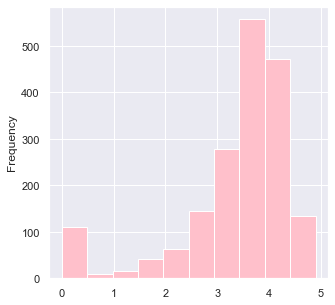

<Figure size 720x576 with 0 Axes>

In [8]:
df1.groupby('Cuisines')['Aggregate rating'].mean().plot.hist(orientation='vertical', color='pink', figsize=(5,5))
plt.figure()

Plot the aggreigate rating of the dataframe

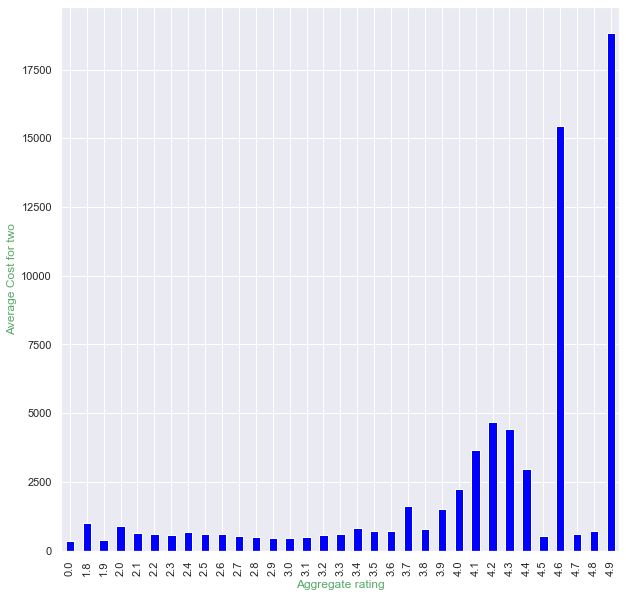

<Figure size 720x576 with 0 Axes>

In [9]:
df1.groupby('Aggregate rating')['Average Cost for two'].mean().plot(kind='bar', figsize=(10,10), color='blue')
plt.xlabel('Aggregate rating', color='g')
plt.ylabel('Average Cost for two', color='g')
plt.figure();

Print the average number of the restaurant have table booking service or not

In [10]:
print('Has table booking = ', df1[df1['Has Table booking']=='Yes']['Aggregate rating'].mean())
print('Hasn`t table booking= ', df1[df1['Has Table booking']=='No']['Aggregate rating'].mean())

Has table booking =  3.4419689119170984
Hasn`t table booking=  2.559358989634219


Plot the rating

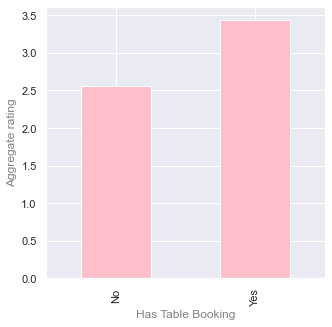

<Figure size 720x576 with 0 Axes>

In [11]:
df1.groupby('Has Table booking')['Aggregate rating'].mean().plot(kind='bar', color='pink', figsize=(5,5))
plt.xlabel('Has Table Booking', color='grey')
plt.ylabel('Aggregate rating', color='grey') 
plt.figure();

# Вывод:
Различия в рейтинге ресторанов существенно зависит от бронирования столиков. Заведения, где приветствуется бронирование, находятся в приоритете среди посетителей.

Визуализируйте признак **Rating color** (или **Rating text**) в комбинации с геолокацией (**Longitude**, **Latitude**). Какой вывод можно сделать?

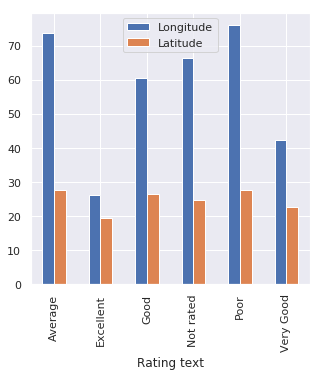

<Figure size 720x576 with 0 Axes>

In [12]:
df1.groupby('Rating text')['Longitude', 'Latitude'].mean().plot(kind='bar', figsize=(5,5))
plt.figure();

Какие ещё инсайты можно найти в имеющихся данных? Творческое задание.

Посмотрим, какие рестораны входят в топ-5.

In [13]:
df1['Restaurant Name'].value_counts().head(5)

Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Name: Restaurant Name, dtype: int64

Построим график.

<Figure size 720x576 with 0 Axes>

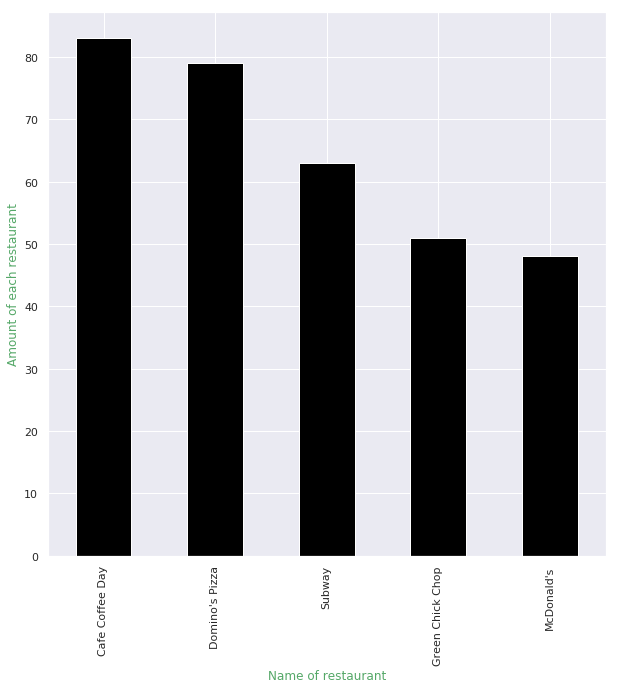

<Figure size 720x576 with 0 Axes>

In [14]:
df1['Restaurant Name'].value_counts().head(5).plot(kind='bar', color='black', figsize=(10,10))
plt.xlabel('Name of restaurant', color='g')
plt.ylabel('Amount of each restaurant', color='g')
plt.figure()

Отсортируем кухни по популярности.

In [15]:
df1['Cuisines'].value_counts()

North Indian                                                                      936
North Indian, Chinese                                                             511
Chinese                                                                           354
Fast Food                                                                         354
North Indian, Mughlai                                                             334
Cafe                                                                              299
Bakery                                                                            218
North Indian, Mughlai, Chinese                                                    197
Bakery, Desserts                                                                  170
Street Food                                                                       149
Pizza, Fast Food                                                                  131
Chinese, Fast Food                                    

Построим график.

<Figure size 720x576 with 0 Axes>

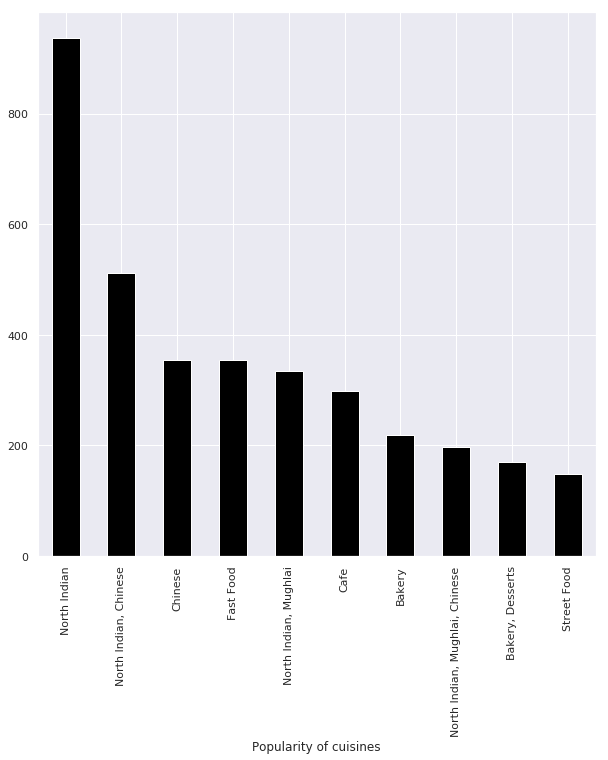

<Figure size 720x576 with 0 Axes>

In [16]:
df1['Cuisines'].value_counts().head(10).plot(kind='bar', figsize = (10,10), color='black')
plt.xlabel('Popularity of cuisines')
plt.figure()

In [2]:
res = pd.read_csv("data/zomato.csv",encoding="ISO-8859-1")
country = pd.read_csv('data/Country-Code.csv')

In [17]:
res.columns  

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [19]:
country.columns

Index(['Country Code', 'Country'], dtype='object')

In [22]:
country['Country'].unique()

array(['India', 'Australia', 'Brazil', 'Canada', 'Indonesia',
       'New Zealand', 'Phillipines', 'Qatar', 'Singapore', 'South Africa',
       'Sri Lanka', 'Turkey', 'UAE', 'United Kingdom', 'United States'],
      dtype=object)

In [24]:
country[country['Country'] == 'India']['Country Code']

0    1
Name: Country Code, dtype: int64

In [3]:
res['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasí_lia', 'Rio de Janeiro', 'Sí£o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Miller', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentha